In [66]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.ticker as tick
%matplotlib inline

In [67]:
data=pd.read_csv('customer_data.csv')

In [68]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
data.shape

(7043, 21)

In [70]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [71]:
#statistics of numeric variables
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Results for categorical data in numerical form would be improper like SeniorCitizen in the above table.

In [72]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Text(0.5, 1.0, 'Count of customers in both categories')

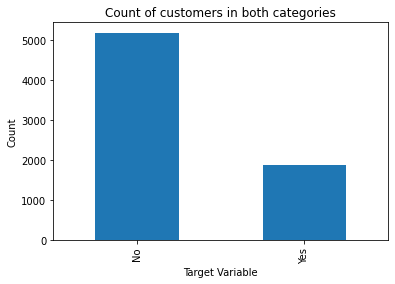

In [73]:
data['Churn'].value_counts().plot(kind="bar")
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Count of customers in both categories')

In [74]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [75]:
data['Churn'].value_counts()*100/len(data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [78]:
data2=data.copy()

In [79]:
data2.TotalCharges=pd.to_numeric(data2.TotalCharges,errors="coerce")

In [80]:
data2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that TotalCharges has null values when converted to numeric type. As the null values are very less in number, we can drop the rows from further consideration.

In [81]:
data2.dropna(inplace=True)

In [82]:
data2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [83]:
data2.tenure.max()

72

Let's group the tenure in bins of 12 months for further analysis.

In [84]:
bins=["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

In [85]:
data2["tenure_grp"]=pd.cut(data2.tenure,range(1,80,12),right=False,labels=bins)

In [86]:
data2.tenure_grp.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_grp, dtype: int64

In [87]:
#drop the columns not useful for prediction
data2.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [88]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# UNIVARIATE ANALYSIS

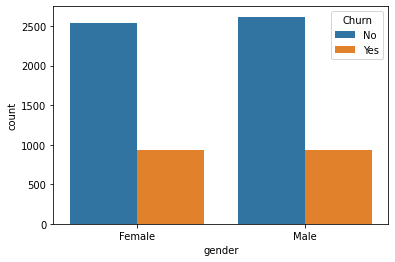

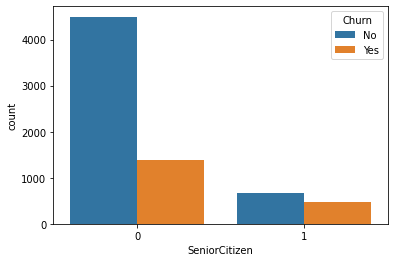

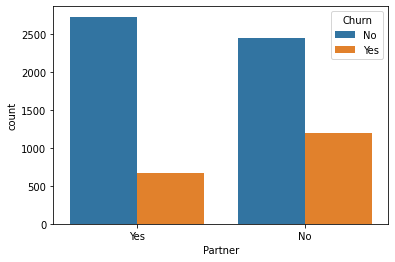

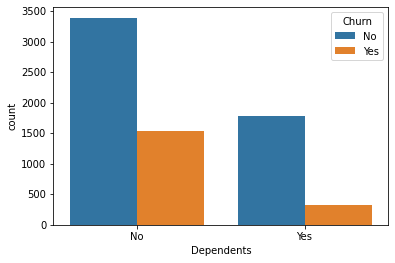

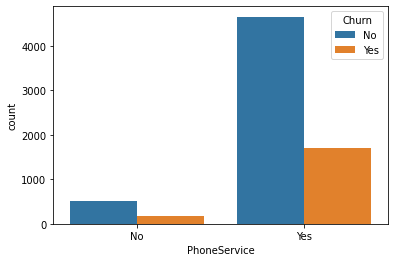

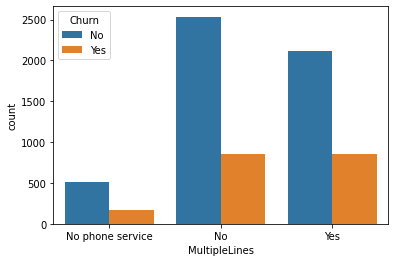

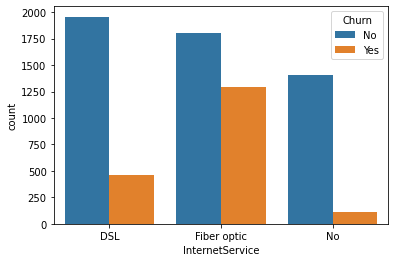

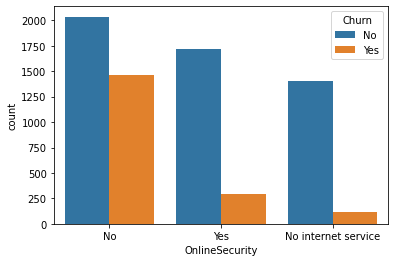

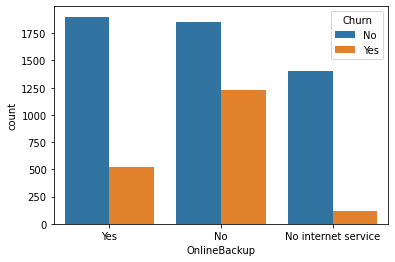

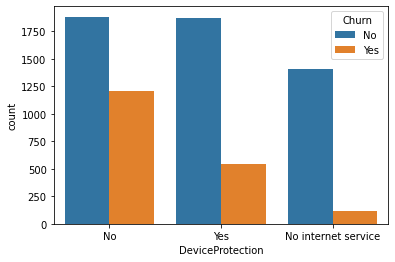

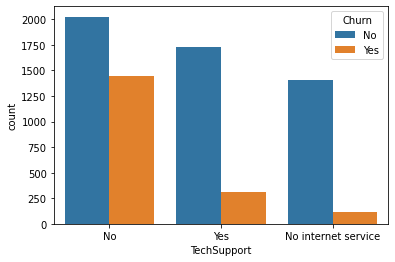

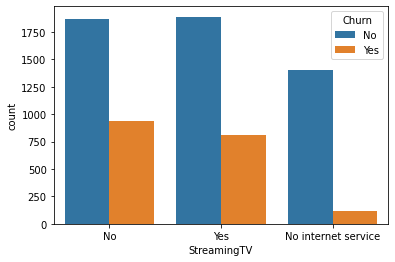

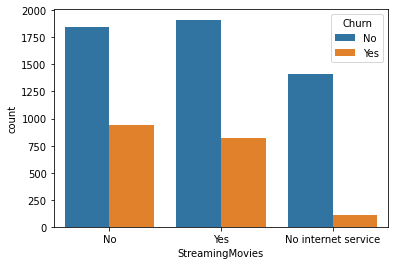

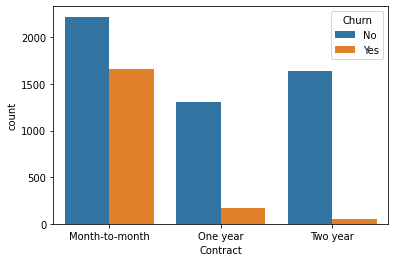

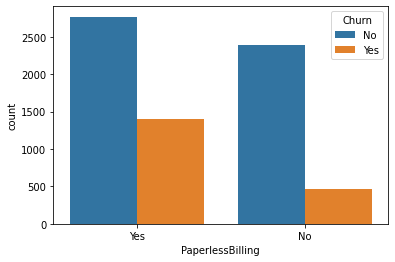

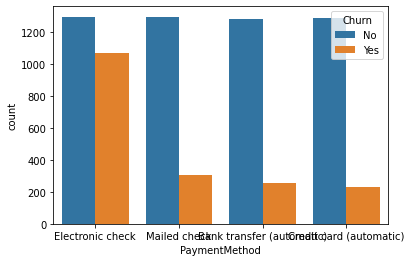

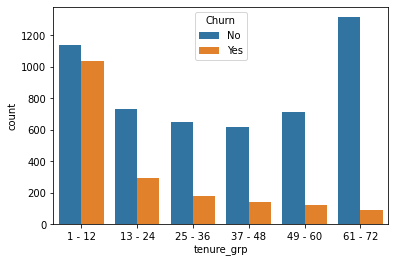

In [89]:
for i,attribute in enumerate(data2.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data2,x=attribute,hue='Churn')

In [90]:
#Converting target variable into numeric variable
data2['Churn']=np.where(data2.Churn=='Yes',1,0)
data2['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [91]:
#Converting all categorical variables into dummy variables
data2_dm=pd.get_dummies(data2)
data2_dm.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [92]:
data2_dm.columns.values

array(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two ye

In [93]:
#Dropping the redundant columns
#data2_dm.drop(columns=['Partner_No','Dependents_No','PhoneService_No','MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],axis=1,inplace=True)

In [94]:
data2_dm.shape

(7032, 51)

In [95]:
data2_dm.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


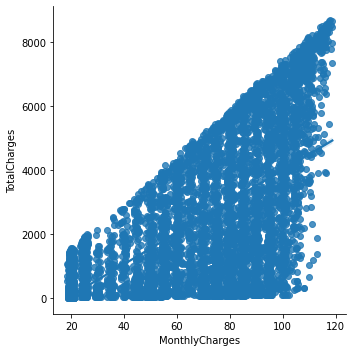

In [96]:
sns.lmplot(data=data2_dm,x='MonthlyCharges',y='TotalCharges',fit_reg=True)

Total charges increase as monthly charges increase

Text(0.5, 1.0, 'Monthly charges vs Churn')

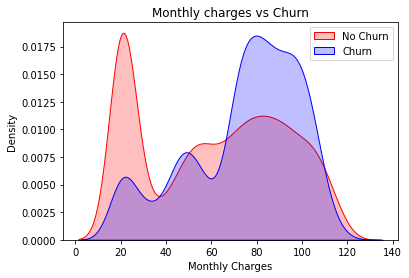

In [97]:
mc=sns.kdeplot(data2_dm.MonthlyCharges[data2_dm['Churn']==0],color='Red',shade=True)
mc=sns.kdeplot(data2_dm.MonthlyCharges[data2_dm['Churn']==1],color='Blue',shade=True)
mc.legend(['No Churn','Churn'],loc='upper right')
mc.set_xlabel('Monthly Charges')
mc.set_ylabel('Density')
mc.set_title('Monthly charges vs Churn')

Churn is high when monthy charges are high

Text(0.5, 1.0, 'Total charges vs Churn')

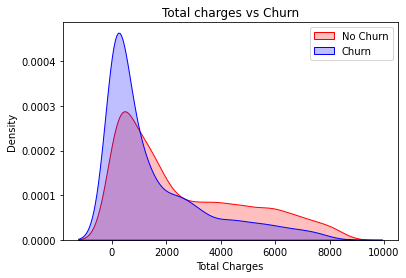

In [98]:
tot=sns.kdeplot(data2_dm.TotalCharges[data2_dm['Churn']==0],color='Red',shade=True)
tot=sns.kdeplot(data2_dm.TotalCharges[data2_dm['Churn']==1],color='Blue',shade=True)
tot.legend(['No Churn','Churn'],loc='upper right')
tot.set_xlabel('Total Charges')
tot.set_ylabel('Density')
tot.set_title('Total charges vs Churn')

Here, churn is more when total charges are low. This does'nt seem logical but this might be the result some other attribute's effect (most probably tenure).

<AxesSubplot:>

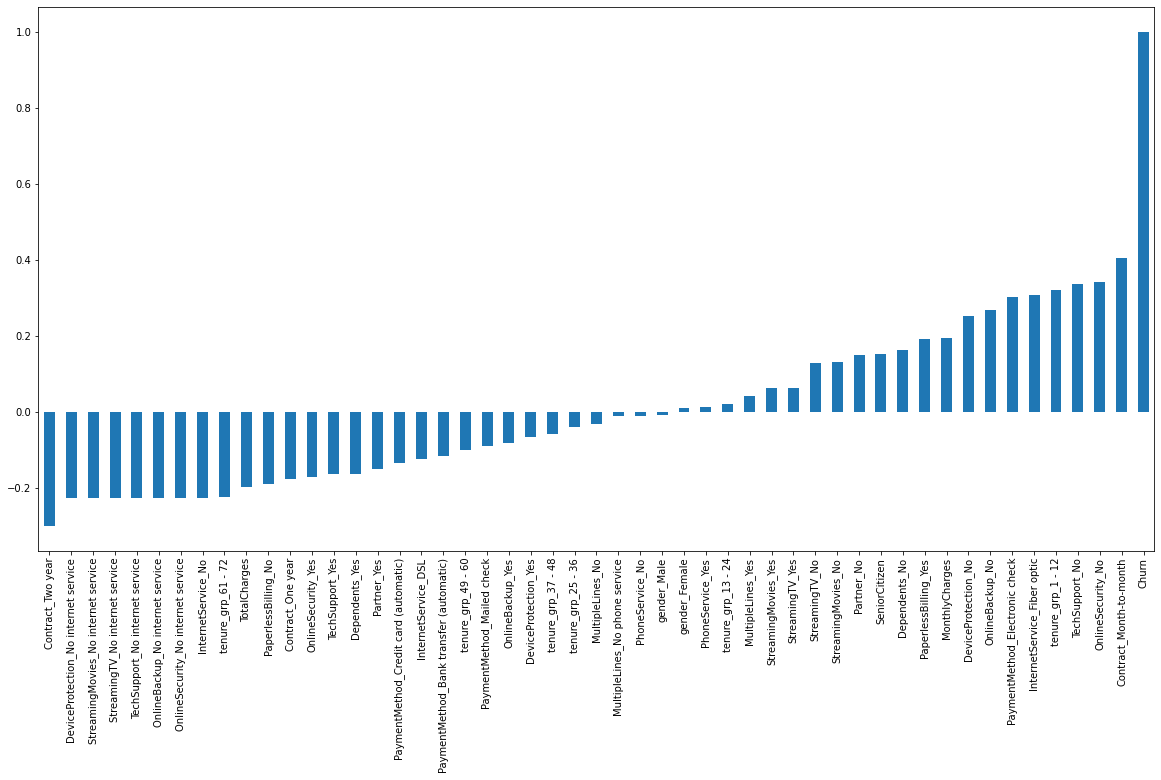

In [99]:
#Visualizing the correlation among attributes
plt.figure(figsize=(20,10))
data2_dm.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:>

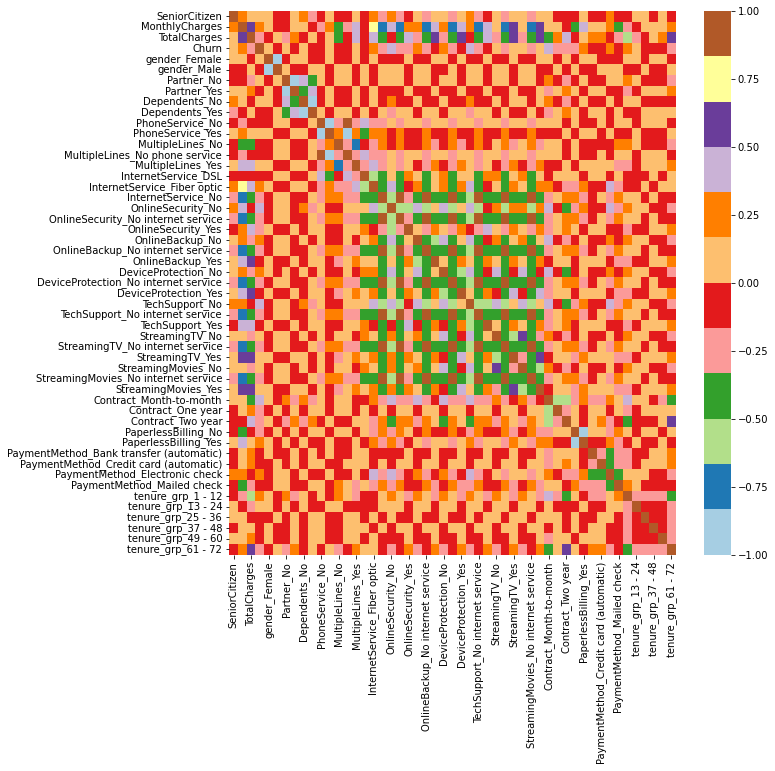

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(data2_dm.corr(),cmap='Paired')

Insights from analysis:
Low churn is observed in cases of long contracts,subscription without internet service, customers engaged for more than 5 years.
High churn is observed in cases of monthly contracts, Internet service, No onine security, No tech support, first year subscription.
    Few factors like gender, phone service have almost no effect on churn.

# BIVARIATE ANALYSIS

In [107]:
df1=data2.loc[data2_dm['Churn']==1]
df0=data2.loc[data2_dm['Churn']==0]

In [108]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


In [109]:
df0.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,13 - 24
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,1 - 12


In [110]:
def uniplot(df,col,title,hue=None):
    p=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue)
    p.set_title(title)

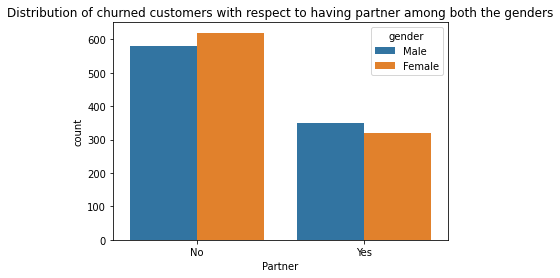

In [111]:
uniplot(df1,col='Partner',title='Distribution of churned customers with respect to having partner among both the genders',hue='gender')

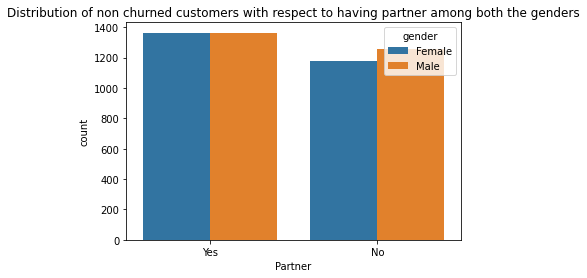

In [112]:
uniplot(df0,col='Partner',title='Distribution of non churned customers with respect to having partner among both the genders',hue='gender')

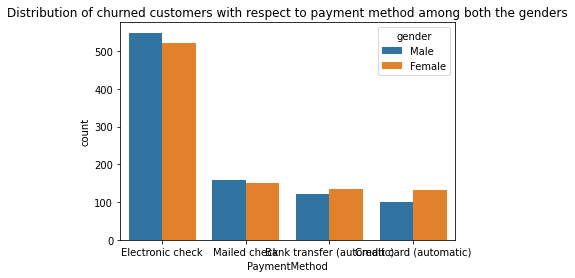

In [113]:
uniplot(df1,col='PaymentMethod',title='Distribution of churned customers with respect to payment method among both the genders',hue='gender')

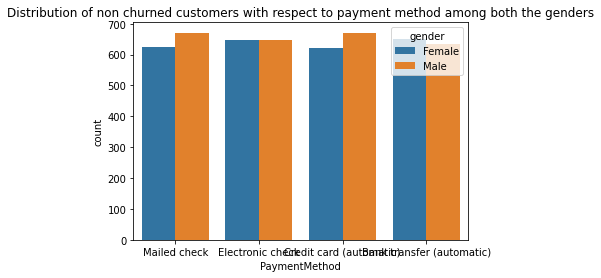

In [114]:
uniplot(df0,col='PaymentMethod',title='Distribution of non churned customers with respect to payment method among both the genders',hue='gender')

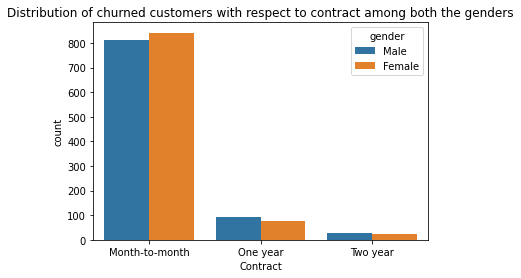

In [115]:
uniplot(df1,col='Contract',title='Distribution of churned customers with respect to contract among both the genders',hue='gender')

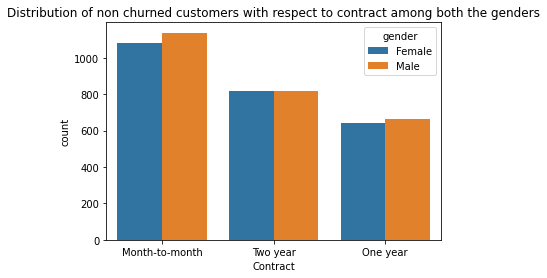

In [116]:
uniplot(df0,col='Contract',title='Distribution of non churned customers with respect to contract among both the genders',hue='gender')

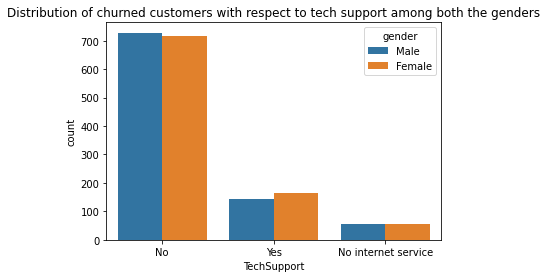

In [117]:
uniplot(df1,col='TechSupport',title='Distribution of churned customers with respect to tech support among both the genders',hue='gender')

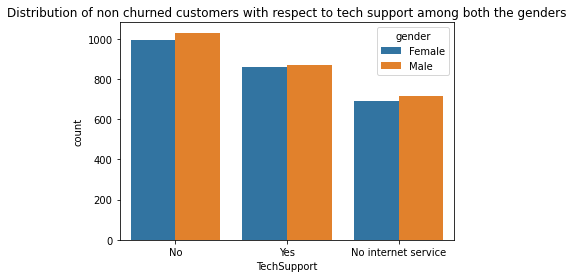

In [118]:
uniplot(df0,col='TechSupport',title='Distribution of non churned customers with respect to tech support among both the genders',hue='gender')

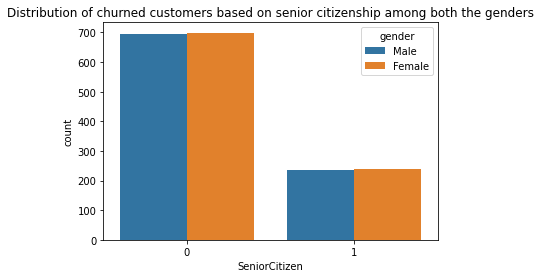

In [119]:
uniplot(df1,col='SeniorCitizen',title='Distribution of churned customers based on senior citizenship among both the genders',hue='gender')

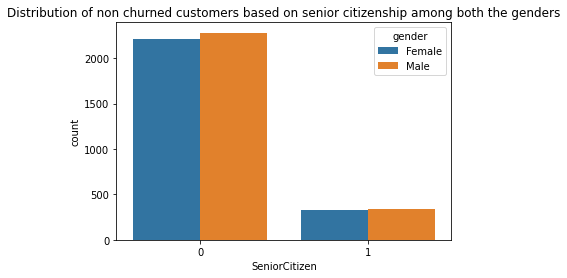

In [120]:
uniplot(df0,col='SeniorCitizen',title='Distribution of non churned customers based on senior citizenship among both the genders',hue='gender')

# CONCLUSION

Monthly contracted customers are most likely to churn.

Customers with electronic check medium churn the most.

No online security and no tech support leads to more churning.

Customers with subscription including internet services mostly churn.

Non senior citizens are more likely to churn.

In [121]:
data2_dm.to_csv('tel_churn_data.csv')

In [3]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [4]:
data=pd.read_csv('tel_churn_data.csv')

In [5]:
data.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [6]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [8]:
x=data.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [9]:
y=data['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
dt_model=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=6,min_samples_leaf=8)

In [12]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [13]:
y_pred=dt_model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [14]:
dt_model.score(x_test,y_test)

0.7896233120113717

In [15]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1032
           1       0.64      0.48      0.55       375

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [16]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [17]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [18]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [19]:
dt_model2=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [20]:
dt_model2.fit(xr_train,yr_train)
yr_predict = dt_model2.predict(xr_test)
model_score_r = dt_model2.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.8262342691190707
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1021
           1       0.84      0.80      0.82      1045

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [21]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[866 155]
 [204 841]]


In [22]:
## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [25]:
rf_model.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [26]:
yr_predict = rf_model.predict(xr_test)

In [27]:
model_score_rf = rf_model.score(xr_test, yr_test)

In [28]:
print(model_score_rf)
print(metrics.classification_report(yr_test, yr_predict))

0.8320425943852856
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1021
           1       0.80      0.88      0.84      1045

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [29]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[797 224]
 [123 922]]


In [30]:
##  PCA

In [31]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train)
xr_test_pca = pca.transform(xr_test)
explained_variance = pca.explained_variance_ratio_

In [32]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [33]:
model.fit(xr_train_pca,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [34]:
yr_predict_pca = model.predict(xr_test_pca)

In [35]:
model_score_r_pca = model.score(xr_test_pca, yr_test)

In [36]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test, yr_predict_pca))

0.6282671829622459
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1021
           1       0.65      0.59      0.61      1045

    accuracy                           0.63      2066
   macro avg       0.63      0.63      0.63      2066
weighted avg       0.63      0.63      0.63      2066



In [45]:
#Results are not any better using PCA and Decision Tree gave better results among the three models.

In [38]:
import pickle

In [39]:
filename = 'churn_pred_model.sav'

In [40]:
pickle.dump(dt_model2, open(filename, 'wb'))

In [41]:
load_model = pickle.load(open(filename, 'rb'))

In [42]:
model_score = load_model.score(xr_test, yr_test)

In [43]:
model_score

0.8262342691190707